# Mbati-Ngombe-Gruppe

* [Funde](#Funde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
* [Verbreitung](#Verbreitung)

In [3]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'MBN'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [467]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Ort.ort_fluss,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Anzahl) != ''))""".replace('\n',' ')
# Anzahl != damit fotografierte Gefäße nicht mit dabei ist

df = pd.read_sql(sql, con)
# display(df.head())

In [468]:
df.pivot_table(values = 'objID', index = 'Typ', aggfunc = len, margins = True)

Typ
MBN        23.0
MBN (?)     1.0
All        24.0
Name: objID, dtype: float64

In [469]:
df_pivot = df.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot

Anzahl  Gewicht
ort_fluss Ort                     bef_nr                 
Lua       Ilawa (Fpl. 232)        85/501       2    943.0
          Maluba (Fpl. 230)       85/101       3    158.0
                                  85/103       2    125.0
Ubangi    Batanga (Fpl. 209)      85/101       1     19.0
          Dongo (Fpl. 202)        85/101       2     46.0
                                  85/102       3     48.0
          Ebeka (Fpl. 197)        85/101       1     20.0
          Imese (Fpl. 201)        85/101       1     43.0
          Kpetene (Fpl. 220)      85/101       1     36.0
          Libenge (Fpl. 208)      85/101       2     31.0
          Maoko (Fpl. 207)        85/101       1     24.0
          Mbati-Ngombe (Fpl. 204) 85/101       1     39.3
                                  85/501       3   4158.0
                                  85/502       1    667.0

Anzahl Fundorte:

In [415]:
len(df_pivot.index)

14

Anzahl Stücke:

In [416]:
np.sum(df_pivot['Anzahl'])

24

Gewicht insgesamt in kg:

In [417]:
np.sum(df_pivot['Gewicht']) / 1000

6.3573

In [355]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Ort.ort_fluss,
           t_Obj.Scherbe,
           t_Obj.Foto,
           t_Obj.Form_Gef,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Anzahl) = ''))""".replace('\n',' ')

df1 = pd.read_sql(sql, con)
df1

,objID,ort_kurz,Ort,bef_nr,ort_fluss,Scherbe,Foto,Form_Gef,Typ


### Scherbentypen

In [356]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = np.sum)
df_pivot['B'] = 0.
custom_dict = {'G':0,'R':1,'W':3,'B':4}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
G,6.0,25.000000
R,14.0,58.333333
W,4.0,16.666667
B,0.0,0.000000


In [357]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Scherbentypen')
plt.ylabel('Anteil [%]')
plt.show()

## Technologische Merkmale (*fabrics*)

In [358]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.Anzahl,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [359]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


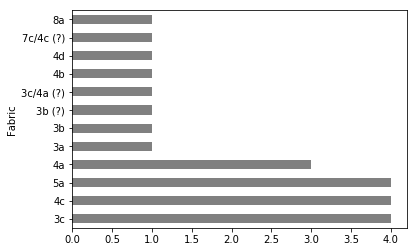

In [360]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [361]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
3c,4,17.391304
4c,4,17.391304
5a,4,17.391304
4a,3,13.043478
3a,1,4.347826


In [362]:
df = df.replace('<1','sehr wenig', regex=True)

a = df.loc[df['MagerungDichte'] != ''] # nur Einträgen, bei denen diese Felder ausgefüllt sind
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
custom_dict = {'sehr wenig':0,'wenig':1,'mittel':3,'viel':4, 'sehr viel':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
sehr wenig,NaN,NaN
wenig,NaN,NaN
mittel,4.0,17.391304
viel,14.0,60.869565
sehr viel,5.0,21.739130


In [363]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Anteil nicht-plastische Partikel')
plt.ylabel('Anteil [%]')
plt.show()

In [364]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungGröße', aggfunc = sum)
custom_dict = {'VF':0,'F':1,'M':3,'C':4, 'VC':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
VF,NaN,NaN
F,NaN,NaN
M,4.0,17.391304
C,15.0,65.217391
VC,4.0,17.391304


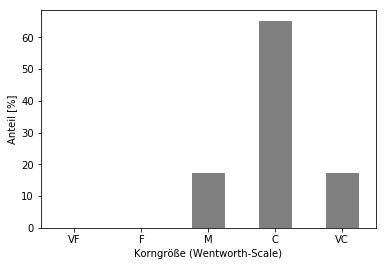

In [365]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Korngröße (Wentworth-Scale)')
plt.ylabel('Anteil [%]')
plt.show()

In [366]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungArt,,
S,17,73.913043
S/rote Partikel,4,17.391304
S/Gl,1,4.347826
S/Schamott/Laterit,1,4.347826


### Brennfarbe

In [367]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,9,39.130435
Sonstig,11,47.826087
Weiß,3,13.043478


In [368]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [369]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

g        21
bg       16
s        14
br        3
g s       2
bg s      2
s s       2
f         1
bg br     1
br bg     1
dtype: int64

### Oberfläche der Scherben

In [370]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Obfl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Obfl', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Anzahl,Prozent
Obfl,,
glatt,16,69.565217
leicht rau,6,26.086957
leicht rau/sandig,1,4.347826


### Wandungsdicke

In [371]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Wandung 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)

# Spannweite ermitteln und als bins nutzen
bins = df['Wandung'].max() - df['Wandung'].min()

mean = df['Wandung'].mean()

df['Wandung'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.axvline(mean, color = 'black', ls = 'dashed', lw = 2.5)
plt.xlabel("Dicke [mm]")
plt.ylabel("Anzahl")
plt.xlim([df['Wandung'].min()-1,df['Wandung'].max()+1])
legend = plt.legend(["Mittelwert"])
legend.get_frame().set_facecolor('white')
plt.tight_layout()

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


In [372]:
df['Wandung'].describe()

count    20.000000
mean      7.650000
std       1.565248
min       4.000000
25%       7.000000
50%       8.000000
75%       8.000000
max      10.000000
Name: Wandung, dtype: float64

In [373]:
df['Wandung'].var()

2.4500000000000006

## Gefäßformen

In [418]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [419]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)
# display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


In [420]:
df_pivot['objID'].sum()

19

In [421]:
df_pivot['GefForm'] = df_pivot.index
a = pd.Series({'sicher':sum(df_pivot['objID'].loc[~df_pivot['GefForm'].str.contains(" ")]),
               'fraglich':sum(df_pivot['objID'].loc[df_pivot['GefForm'].str.contains(" ")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,9,47.368421
sicher,10,52.631579


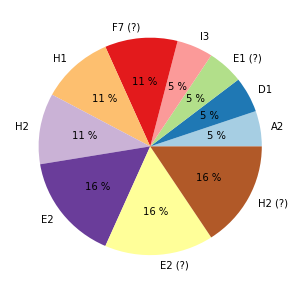

In [422]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [423]:
df['Form_Gef_GR'] = df['Form_Gef'].map(lambda x: str(x)[:1])

df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef_GR', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


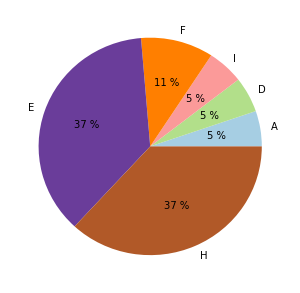

In [424]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

### Proportionen

In [379]:
sql = """SELECT
           [t_Ort].[ort_kurz] || ' ' || [t_Komplex].[bef_nr] || ':' || [t_Obj].[Individuum] AS Ind,
           t_Obj.muendungsD,
           t_Obj.muendungsH,
           t_Obj.minD,
           t_Obj.minD_H,
           t_Obj.maxD,
           t_Obj.maxD_H,
           t_Obj.bodenD,
           t_obj.Form_Gef
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['muendungsD'] = df['muendungsD'].convert_objects(convert_numeric=True)
df['muendungsH'] = df['muendungsH'].convert_objects(convert_numeric=True)
df['minD'] = df['minD'].convert_objects(convert_numeric=True)
df['minD_H'] = df['minD_H'].convert_objects(convert_numeric=True)
df['maxD'] = df['maxD'].convert_objects(convert_numeric=True)
df['maxD_H'] = df['maxD_H'].convert_objects(convert_numeric=True)
df['bodenD'] = df['bodenD'].convert_objects(convert_numeric=True)

# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['maxD-muendH'] = df['maxD'] / df['muendungsH']
# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['muend-min'] = df['muendungsD'] / df['minD']
# Verhältnis aus Maximaler Durchmesser / Minimaler Durchmesser
df['max-min'] = df['maxD'] / df['minD']

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta

In [380]:
a = df.loc[df['Form_Gef'].str.contains("G7c")]
b = df.loc[df['Form_Gef'].str.contains("G3c")]
c = df.loc[df['Form_Gef'].str.contains("G8")] 
d = df.loc[~df['Form_Gef'].str.contains("G7c|G3c|G8")]

fig = plt.figure(1)
fig.set_size_inches(12,15)

ax = plt.subplot(421)

d['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
c['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'y', label = 'G8', alpha = 0.5)
b['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G3c', alpha = 0.5)
a['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G7c', alpha = 0.5)

plt.axvline(d['muendungsD'].mean(), color='g', linestyle = '--')
plt.axvline(c['muendungsD'].mean(), color='y', linestyle = '--')
plt.axvline(b['muendungsD'].mean(), color='b', linestyle = '--')
plt.axvline(a['muendungsD'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.xlabel("Mündungsdurchmesser [cm]")
plt.legend(loc = 2)

ax = plt.subplot(422)

d['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5, orientation='horizontal')
c['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'y', label = 'G8', alpha = 0.5, orientation='horizontal')
b['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G3c', alpha = 0.5, orientation='horizontal')
# a['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G6', alpha = 0.5, orientation='horizontal')

plt.axhline(d['muendungsH'].mean(), color='g', linestyle = '--')
plt.axhline(c['muendungsH'].mean(), color='y', linestyle = '--')
plt.axhline(b['muendungsH'].mean(), color='b', linestyle = '--')
plt.axhline(a['muendungsH'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 1)

# df['muendungsH'].hist(histtype='stepfilled', orientation='horizontal')
plt.ylabel("Mündungshöhe [cm]")

ax = plt.subplot(423)

plt.scatter(d['maxD'], d['muendungsH'], alpha=0.5, c = 'g', s = 50, label = 'Weitere')
plt.scatter(c['maxD'], c['muendungsH'], alpha=0.5, c = 'y', s = 50, label = 'G8')
plt.scatter(b['maxD'], b['muendungsH'], alpha=0.5, c = 'b', s = 50, label = 'G3c')
plt.scatter(a['maxD'], a['muendungsH'], alpha=0.5, c = 'r', s = 50, label = 'G7c')#
plt.legend(loc = 2)
plt.xlabel("Maximaldurchmesser [cm]")
plt.ylabel("Mündungshöhe [cm]")

ax.plot([0, 10,20,30,50],[0, 10,20,30,50], color='black', linestyle = '--')
ax.text(43, 38, '1:1', color='black', fontsize=15)

ax.plot([0, 10,20,30,50],[0, 5,10,15,25], color='black', linestyle = '--')
ax.text(43, 18, '2:1', color='black', fontsize=15)

plt.xlim(0,50) 
plt.ylim(0,50) 

ax.set_aspect('equal')

ax = plt.subplot(424)

d['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
c['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'y', label = 'G8', alpha = 0.5)
b['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G3c', alpha = 0.5)
#a['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G7c', alpha = 0.5)

plt.axvline(d['maxD-muendH'].mean(), color='g', linestyle = '--')
plt.axvline(c['maxD-muendH'].mean(), color='y', linestyle = '--')
plt.axvline(b['maxD-muendH'].mean(), color='b', linestyle = '--')
plt.axvline(a['maxD-muendH'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 1)

# df['maxD-muendH'].hist(histtype='stepfilled', fc='#CCCCCC')
plt.xlabel("Maximaler Durchmesser / Mündungshöhe")

ax = plt.subplot(425)

d['minD'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
c['minD'].hist(histtype='stepfilled', stacked = False, fc = 'y', label = 'G8', alpha = 0.5)
b['minD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G3c', alpha = 0.5)
a['minD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G7c', alpha = 0.5)

plt.axvline(d['minD'].mean(), color='g', linestyle = '--')
plt.axvline(c['minD'].mean(), color='y', linestyle = '--')
plt.axvline(b['minD'].mean(), color='b', linestyle = '--')
plt.axvline(a['minD'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 2)

#df['minD'].hist(histtype='stepfilled', fc='#86B404')
plt.xlabel("Minimaler Durchmesser [cm]")

ax = plt.subplot(426)

d['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
c['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'y', label = 'G8', alpha = 0.5)
b['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G3c', alpha = 0.5)
a['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G7c', alpha = 0.5)

plt.axvline(d['muend-min'].mean(), color='g', linestyle = '--')
plt.axvline(c['muend-min'].mean(), color='y', linestyle = '--')
plt.axvline(b['muend-min'].mean(), color='b', linestyle = '--')
plt.axvline(a['muend-min'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 1)

#df['muend-min'].hist(histtype='stepfilled', fc='#E1F5A9')
#plt.axvline(df['muend-min'].mean(), color='r', linestyle = '--')
# plt.legend(["Mittelwert"])
plt.xlabel("MündungsD / MinD")

ax = plt.subplot(427)

d['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
c['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'y', label = 'G8', alpha = 0.5)
b['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G3c', alpha = 0.5)
a['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G7c', alpha = 0.5)

plt.axvline(d['maxD'].mean(), color='g', linestyle = '--')
plt.axvline(c['maxD'].mean(), color='y', linestyle = '--')
plt.axvline(b['maxD'].mean(), color='b', linestyle = '--')
plt.axvline(a['maxD'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 2)

# df['maxD'].hist(histtype='stepfilled', fc='#2E64FE')
plt.xlabel("Maximaler Durchmesser [cm]")

ax = plt.subplot(428)

d['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
c['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'y', label = 'G8', alpha = 0.5)
b['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G3c', alpha = 0.5)
a['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G7c', alpha = 0.5)

plt.axvline(d['max-min'].mean(), color='g', linestyle = '--')
plt.axvline(c['max-min'].mean(), color='y', linestyle = '--')
plt.axvline(b['max-min'].mean(), color='b', linestyle = '--')
plt.axvline(a['max-min'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

# df['max-min'].hist(histtype='stepfilled', fc='#81BEF7')
# plt.axvline(df['max-min'].mean(), color='r', linestyle = '--')
plt.legend(["Mittelwert"])
plt.legend(loc = 1)
plt.xlabel("MaxD / MinD")

plt.tight_layout()

plt.savefig('../output/figs/3-1-1-11_MBN_Keramik-Abmessungen.pdf')
plt.show()

## Bauchform

In [381]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Bauch
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Bauch) != '')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# die Fragezeichen bei Gef-Form & Bauch-Form einfach löschen
#df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
#df['Form_Bauch'] = df['Form_Bauch'].map(lambda x: x.rstrip(' (?)'))

#display(df.head())

In [382]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Bauch,,
A1,13,92.857143
A2,1,7.142857


## Mündungs- und Randformen

In [427]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

In [428]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID'] / df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M1,9,47.368421
M2,3,15.789474
M4,2,10.526316
M1/M2,1,5.263158
M3,1,5.263158
M3/M1,1,5.263158
M4 (?),1,5.263158
M6/M1,1,5.263158


In [438]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
#display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


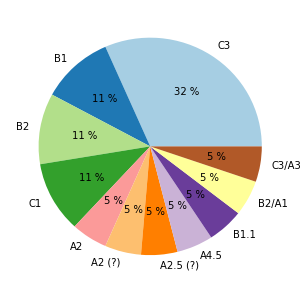

In [439]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [446]:
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Rand'])
df1['Form_Rand'] = df1['Form_Rand'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Rand'] = df1['Form_Rand'].apply(lambda x: x.split('/')[0])\

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot = df_pivot.sort_index(by = ['Prozent'], ascending=False)
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values

,objID,Prozent
Form_Rand,,
C3,7,36.842105
B2,3,15.789474
A2,2,10.526316
B1,2,10.526316
C1,2,10.526316
A2.5,1,5.263158
A4.5,1,5.263158
B1.1,1,5.263158


In [447]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [445]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', columns = 'Form_Rand', fill_value = 0, aggfunc = len)

fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.show()

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


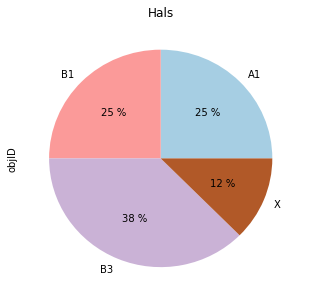

In [450]:
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Hals'])
df1['Form_Hals'] = df1['Form_Hals'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Hals'] = df1['Form_Hals'].apply(lambda x: x.split('/')[0])\

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Hals")

In [389]:
# leere Zellen & X entfernen
b = df['Form_Hals']
b = pd.DataFrame(b)
b = b.dropna()
b = b[b['Form_Hals'] != 'X']
b
# enthält 'kurz' oder nicht
c = pd.Series({'kurz':len(b.loc[b['Form_Hals'].str.contains("kurz")].index),
               'nicht-kurz':len(b.loc[~b['Form_Hals'].str.contains("kurz")].index)})
c = pd.DataFrame(c)
c['Prozent'] = c[0]/c[0].sum()*100
c

,0,Prozent
kurz,1,14.285714
nicht-kurz,6,85.714286


C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


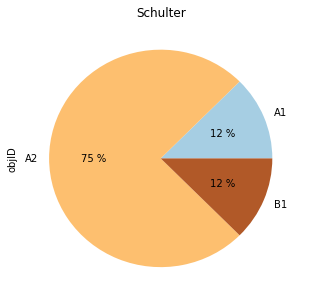

In [451]:
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Schulter'])
df1['Form_Schulter'] = df1['Form_Schulter'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Schulter'] = df1['Form_Schulter'].apply(lambda x: x.split('/')[0])\


df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Schulter")

## Bodenformen

In [452]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Boden', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

,objID,Prozent
Form_Boden,,
B1,5,83.333333
B6,1,16.666667


In [453]:
len(df['Form_Boden'])

6

In [454]:
df

,ort_kurz,ort_name,objID,Typ,Form_Gef,Form_Boden
0,MBN,Mbati-Ngombe,240,MBN,H1,B1
1,ILW,Ilawa,1482,MBN,I3,B1
2,ILW,Ilawa,1483,MBN,H2,B1
3,MBN,Mbati-Ngombe,1497,MBN,A2,B6
4,MBN,Mbati-Ngombe,1499,MBN,E2,B1
5,MBN,Mbati-Ngombe,5289,MBN,H1,B1


## Verzierungselemente

In [4]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


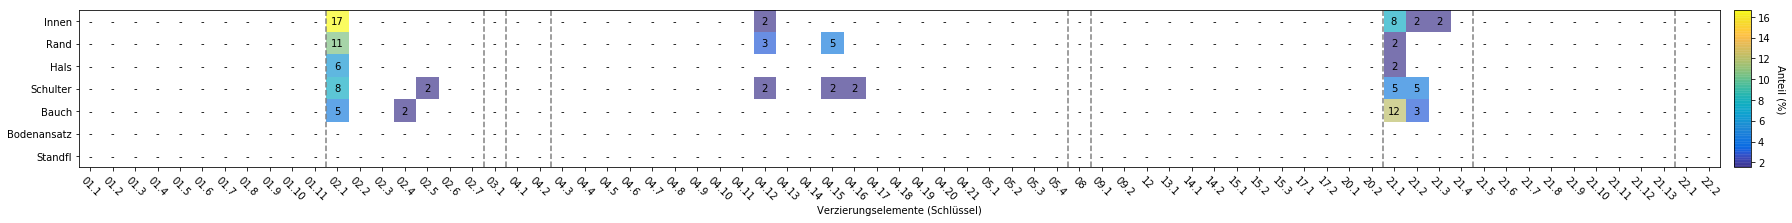

In [5]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-1-11_MBN_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [455]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzName_alt,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [456]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len)
df_pivot = df_pivot.fillna(0)
# Sortierung für graphische Darstellung umdrehen
df_pivot = df_pivot.sort_index(ascending=True)
# heatmap siehe http://yonatanfriedman.com/docs/survey/plotting.html

In [457]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.show()

In [458]:
df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


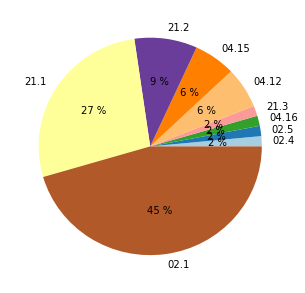

In [459]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

In [460]:
a = pd.Series({'Roulette-Verzierung':len(df.loc[df['verzName'].str.contains("21.")].index),
               'Weitere Verzierungen':len(df.loc[~df['verzName'].str.contains("21.")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Roulette-Verzierung,25,37.878788
Weitere Verzierungen,41,62.121212


In [461]:
# nur Roulette-Verzierungen herausfiltern
b = df.loc[df['verzName'].str.contains("21.")]

c = pd.Series({'vegetabilisches Roulette':len(b.loc[df['verzName_alt'].str.contains("V08a")].index),
               'Schnitz-Roulette':len(b.loc[~df['verzName_alt'].str.contains("V08a")].index)})
c = pd.DataFrame(c)
c['Prozent'] = c[0]/c[0].sum()*100
c

,0,Prozent
Schnitz-Roulette,0,0.0
vegetabilisches Roulette,25,100.0


In [402]:
b.loc[df['verzName_alt'].str.contains("V08a")].pivot_table(values = 'objID', index = 'verzName', aggfunc = len)

verzName
21.1    18
21.2     6
21.3     1
Name: objID, dtype: int64

In [403]:
b.loc[~df['verzName_alt'].str.contains("V08a")].pivot_table(values = 'objID', index = 'verzName', aggfunc = len)

,objID
verzName,


In [404]:
len(b.loc[~df['verzName_alt'].str.contains("V08a")].pivot_table(values = 'objID', index = 'verzName', aggfunc = len))

0

## Verbreitung

In [405]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
2,Ebeka (Fpl. 197),197,18.031148,1.429335,MBN (?)
3,Imese (Fpl. 201),201,18.105096,2.116407,MBN
1,Dongo (Fpl. 202),202,18.404747,2.721870,MBN
8,Mbati-Ngombe (Fpl. 204),204,18.495671,2.888154,MBN
7,Maoko (Fpl. 207),207,18.642191,3.407332,MBN
5,Libenge (Fpl. 208),208,18.632694,3.648189,MBN
0,Batanga (Fpl. 209),209,18.594438,3.710706,MBN
4,Kpetene (Fpl. 220),220,19.071738,4.899383,MBN
6,Maluba (Fpl. 230),230,18.523706,2.806193,MBN
2,Ilawa (Fpl. 232),232,18.690466,3.004896,MBN


In [406]:
df.to_csv("../data/processed/3-1-1-11_MBN_Verbreitung.csv", index = False)

## Tafeln

In [407]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Form_Gef,Form_Rand,Form_Boden
0,8,9,DON,85/101,NaN,23,MBN,H2 (?),A2.5 (?),None
1,10,8,MBN,85/101,NaN,30,MBN,F7 (?),C1,None
2,10,9,MBN,85/501,NaN,1,MBN,H1,C3,B1
3,10,10,MBN,85/501,NaN,2,MBN,E2,B1,B1
4,10,11,MBN,85/501,NaN,3,MBN,H1,C3/A3,B1
5,10,12,MBN,85/502,NaN,NaN,MBN,A2,B2/A1,B6
6,27,10,MLB,85/103,NaN,11,MBN,E1 (?),C3,None
7,27,11,MLB,85/103,NaN,1,MBN,H2 (?),C3,None
8,27,15,ILW,85/501,NaN,2,MBN,H2,C3,B1
9,27,16,ILW,85/501,NaN,1,MBN,I3,A4.5,B1
